# DECISION TREE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline #for encoding
from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.tree import DecisionTreeClassifier #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree

UsageError: unrecognized arguments: #for encoding


In [123]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

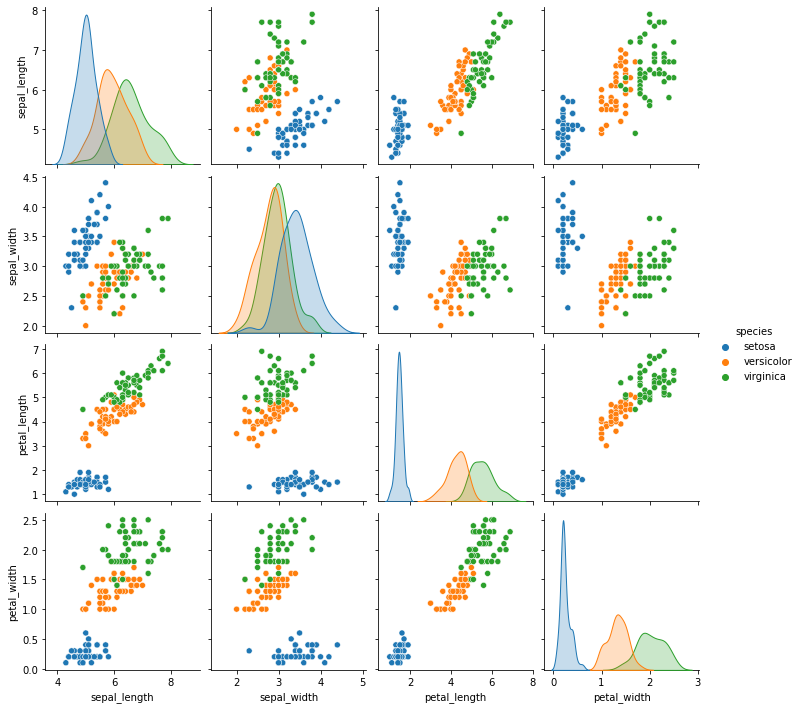

In [6]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'species')

In [7]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

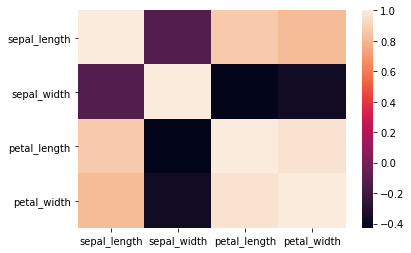

In [8]:
# correlation matrix
sns.heatmap(df.corr())

In [9]:
y = df['species']
X = df.drop('species', axis =1)

In [10]:
from sklearn.preprocessing import LabelEncoder #for train test splitting

In [11]:
#label encoding
le = LabelEncoder()
y = le.fit_transform(target)
y

NameError: name 'target' is not defined

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [18]:
from sklearn.tree import DecisionTreeClassifier #for checking testing results

In [19]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
score_train=dtree.score(X_train,y_train)
score_test=dtree.score(X_test,y_test)
score_train,score_test

(1.0, 1.0)

In [20]:
train_score=[]
test_score=[]
for i in range(1,25):
    clsfr=DecisionTreeClassifier(max_depth=i)
    clsfr.fit(X_train,y_train)
    # pred_y1=clsfr.predict(test_x,test_y)
    score_train=clsfr.score(X_train,y_train)
    score_test=clsfr.score(X_test,y_test)
    train_score.append(score_train)
    test_score.append(score_test)

Text(0, 0.5, 'SCORE')

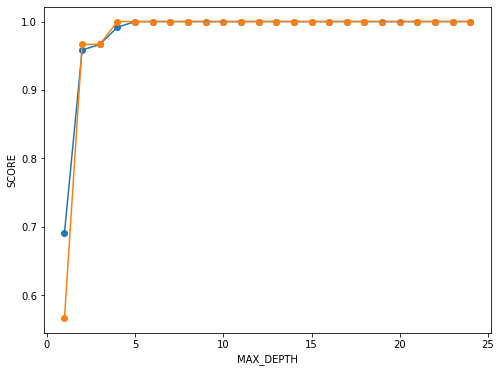

In [21]:
x=range(1,25)
plt.figure(figsize=(8,6))
plt.plot(x,train_score,marker="o")
plt.plot(x,test_score,marker="o")
plt.xlabel("MAX_DEPTH")
plt.ylabel("SCORE")

In [22]:
clsfr=DecisionTreeClassifier(max_depth=7)
clsfr.fit(X_train,y_train)
# pred_y1=clsfr.predict(test_x,test_y)
score_train=clsfr.score(X_train,y_train)
score_test=clsfr.score(X_test,y_test)
score_test,score_train

(1.0, 1.0)

In [23]:
train_score=[]
test_score=[]
for i in range(2,25):
    clsfr=DecisionTreeClassifier(max_depth=7,min_samples_split=i)
    clsfr.fit(X_train,y_train)
    # pred_y1=clsfr.predict(test_x,test_y)
    score_train=clsfr.score(X_train,y_train)
    score_test=clsfr.score(X_test,y_test)
    train_score.append(score_train)
    test_score.append(score_test)

Text(0, 0.5, 'SCORE')

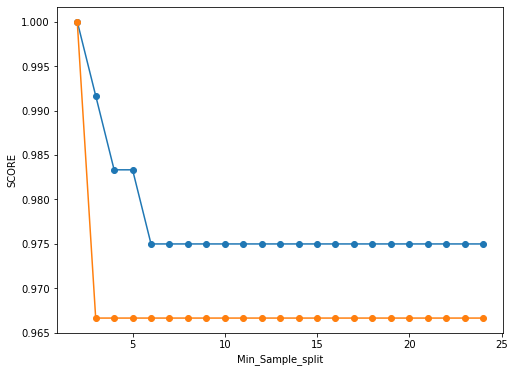

In [24]:
x=range(2,25)
plt.figure(figsize=(8,6))
plt.plot(x,train_score,marker="o")
plt.plot(x,test_score,marker="o")
plt.xlabel("Min_Sample_split")
plt.ylabel("SCORE")

# Final score of decision tree classifier after tunning the parameters

In [25]:
clsfr=DecisionTreeClassifier(max_depth=8,min_samples_split=13,min_samples_leaf=39)
clsfr.fit(X_train,y_train)
# pred_y1=clsfr.predict(test_x,test_y)
score_train=clsfr.score(X_train,y_train)
score_test=clsfr.score(X_test,y_test)
score_test,score_train

(0.9666666666666667, 0.9583333333333334)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

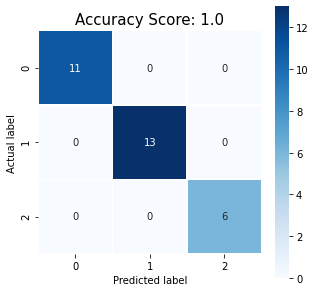

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [30]:
from sklearn.tree import plot_tree

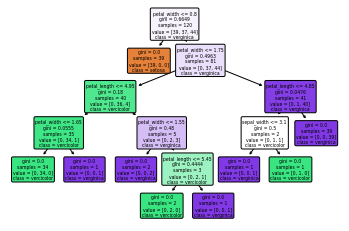

In [31]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns,class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

In [32]:
clsfr=DecisionTreeClassifier(max_depth=8,min_samples_split=13,min_samples_leaf=39)
clsfr.fit(X_train,y_train)
# pred_y1=clsfr.predict(test_x,test_y)
score_train=clsfr.score(X_train,y_train)
score_test=clsfr.score(X_test,y_test)
score_test,score_train

(0.9666666666666667, 0.9583333333333334)

# RANDOM FOREST

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
model.score(X_test,y_test)

0.9666666666666667

In [39]:
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [40]:
model.score(X_test,y_test)

1.0

In [41]:
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [42]:
model.score(X_test,y_test)

1.0

In [43]:
y_pred=model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [46]:
import seaborn as sns

Text(69.0, 0.5, 'Truth')

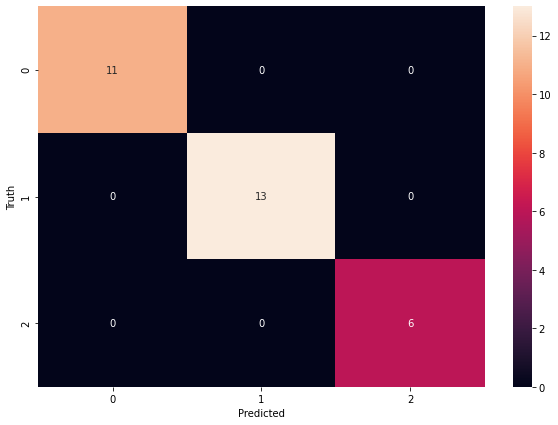

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# KNN

In [48]:
import math

In [49]:
def euclideanDistance(instance1,instance2,length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x]-instance2[x]),2)
    return math.sqrt(distance)

In [50]:
data1 = [2,2,4,5,'a']
data2 = [3,4,6,1,'b']
distance = euclideanDistance(data1,data2,4)
print('distance:'+repr(distance))

distance:5.0


# KNN Prediction

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
model = KNeighborsClassifier()

In [56]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [58]:
model.score(X_test,y_test)

0.9666666666666667

In [59]:
y_pred=model.predict(X_test)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        11\n  versicolor       1.00      0.92      0.96        13\n   virginica       0.86      1.00      0.92         6\n\n    accuracy                           0.97        30\n   macro avg       0.95      0.97      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(),X,y)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [63]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [64]:
model.score(X_test,y_test)

0.9666666666666667

# ADABOOST

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
model=AdaBoostClassifier()

In [77]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=400)

In [71]:
model.score(X_test,y_test)

0.9666666666666667

In [72]:
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        11\n  versicolor       0.93      1.00      0.96        13\n   virginica       1.00      0.83      0.91         6\n\n    accuracy                           0.97        30\n   macro avg       0.98      0.94      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [75]:
from sklearn.model_selection import cross_val_score
cross_val_score(AdaBoostClassifier(),X,y)

array([0.96666667, 0.93333333, 0.9       , 0.93333333, 1.        ])

In [91]:
model=AdaBoostClassifier(n_estimators=100)

In [92]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [93]:
model.score(X_test,y_test)

0.9

In [94]:
from sklearn import metrics

In [95]:
predictions=metrics.accuracy_score(y_test,y_pred)
predictions

0.9666666666666667

In [96]:
print('The Accuracy Score is:',predictions*100,'%')

The Accuracy Score is: 96.66666666666667 %


In [101]:
from sklearn import model_selection
from sklearn.model_selection import KFold

In [111]:
num_trees=30
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model,X,y,cv=kfold)
print(results)

[1.         1.         1.         1.         0.93333333 0.86666667
 1.         0.86666667 0.8        0.93333333]


In [112]:
results.mean()

0.9400000000000001

# XGBOOST

In [114]:
from sklearn import svm
from xgboost import XGBClassifier

In [115]:
clf = XGBClassifier()

In [121]:
num_trees = 10
kfold = model_selection.KFold(n_splits=10)
model = XGBClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model,X,y,cv=kfold)
print(results)

C:\Users\SONY\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SONY\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SONY\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of lab

[19:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SONY\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SONY\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SONY\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of lab

[19:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SONY\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SONY\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\SONY\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of lab

[19:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

C:\Users\SONY\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [119]:
results.mean()

0.9466666666666667

# K-MEANS CLUSTERING

In [129]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [135]:
data=df.drop(['sepal_length','sepal_width'],axis=1)
data.head(3)

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa


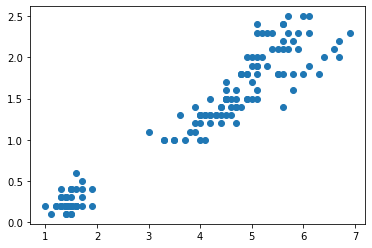

In [136]:
plt.scatter(data['petal_length'],data['petal_width'])

In [137]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [138]:
kn=KMeans(n_clusters=3)
kn

KMeans(n_clusters=3)

In [142]:
y_pred = kn.fit_predict(data[['petal_length','petal_width']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [159]:
data['cluster'] = y_pred
data.head()

,petal_length,petal_width,species,cluster
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1


No handles with labels found to put in legend.


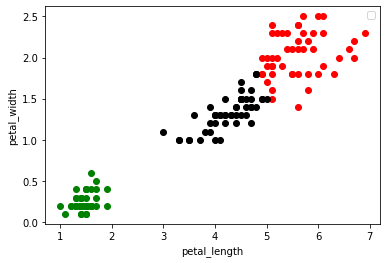

In [160]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.petal_length,df1['petal_width'],color='green')
plt.scatter(df2.petal_length,df2['petal_width'],color='red')
plt.scatter(df3.petal_length,df3['petal_width'],color='black')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

In [163]:
scaler = MinMaxScaler()
scaler.fit(data[['petal_width']])
data['petal_width'] = scaler.transform(data['petal_width'])

scaler.fit(data.petal_length)
data.petal_length = scaler.transform(darta.petal_length)
data = data.reshape(-1,1)

data.head(3)


ValueError: Expected 2D array, got 1D array instead:
array=[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [164]:
data.head(3)

,petal_length,petal_width,species,cluster
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1


In [176]:
kn=KMeans(n_clusters=2)
y_predicted = kn.fit_predict(data[['petal_width','petal_length']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [177]:
data['cluster'] = y_predicted
data

,petal_length,petal_width,species,cluster
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1
...,...,...,...,...
145,5.2,2.3,virginica,0
146,5.0,1.9,virginica,0
147,5.2,2.0,virginica,0
148,5.4,2.3,virginica,0


In [178]:
kn.cluster_centers_

array([[1.68181818, 4.92525253],
       [0.2627451 , 1.49215686]])

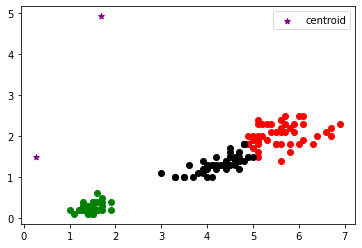

In [179]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.petal_length,df1['petal_width'],color='green')
plt.scatter(df2.petal_length,df2['petal_width'],color='red')
plt.scatter(df3.petal_length,df3['petal_width'],color='black')
plt.scatter(kn.cluster_centers_[:,0],kn.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [180]:
k_rg = range(1,10)
sse = []
for k in k_rg:
    km=KMeans(n_clusters=k)
    km.fit(data[['petal_width','petal_length']])
    sse.append(km.inertia_)

C:\Users\SONY\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [181]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 13.983213141025644,
 11.02514511025038,
 9.244804827285604,
 7.840737026389505,
 6.456494541406302]

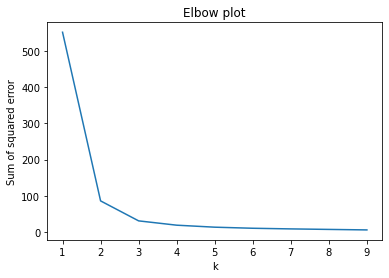

In [182]:
plt.title('Elbow plot')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rg,sse)